In [42]:
# import packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
# load and preprocess data
img_path = '1.jpg'
img = load_img(img_path, target_size = (224, 224))
img = img_to_array(img)

x = np.expand_dims(img, axis = 0)
x = preprocess_input(x)

In [3]:
# set up VGG16 model without fully connected layer
model_vgg = VGG16(weights = 'imagenet', include_top = False)

In [9]:
# extracting features 
features = model_vgg.predict(x)
print(features.shape)

(1, 7, 7, 512)


In [5]:
# flatten 
features = features.reshape(1, 7*7*512)

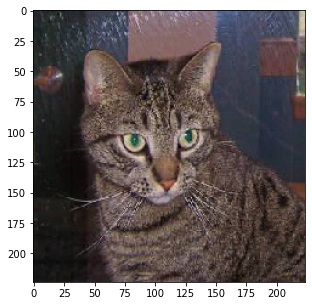

In [6]:
# visualize the data 
fig1 = plt.figure(figsize = (5, 5))
img = load_img(img_path, target_size = (224, 224))
plt.imshow(img)
plt.show()

In [23]:
# method for laoding and preprocessing images; returns the feature of the given image
def imageProcess(img_path, model):
    img = load_img(img_path, target_size =(224, 224))
    img = img_to_array(img)
    x = np.expand_dims(img, axis = 0)
    x = preprocess_input(x)
    img_feature = model.predict(x)
    img_feature = img_feature.reshape(1, 25088)
    return img_feature    

In [17]:
# list all file names
folder = "dataset/data_vgg/cats"
dirs = os.listdir(folder)

In [18]:
# generate path for all images
img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder + "//" + i for i in img_path]

In [24]:
# preprocess multiple images
features1 = np.zeros([len(img_path), 25088])
for i in range(len(img_path)):
    feature_i = imageProcess(img_path[i], model_vgg)
    features1[i] = feature_i

In [26]:
# repeat the above 3 steps for the dog images
folder = "dataset/data_vgg/dogs"
dirs = os.listdir(folder)

img_path = []
for i in dirs:                             
    if os.path.splitext(i)[1] == ".jpg":   
        img_path.append(i)
img_path = [folder + "//"+ i for i in img_path]

features2 = np.zeros([len(img_path), 25088])
for i in range(len(img_path)):
    feature_i = imageProcess(img_path[i], model_vgg)
    features2[i] = feature_i 

In [28]:
# print the shape of the image features
print(features1.shape, features2.shape)

(300, 25088) (300, 25088)


In [34]:
# label the results
y1 = np.zeros(300) # 300 dogs
y2 = np.ones(300) # 300 cats

In [35]:
# generate the training data
X = np.concatenate((features1, features2), axis=0)
y = np.concatenate((y1, y2), axis=0)
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(600, 25088) (600, 1)


In [36]:
# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [39]:
# set up the fully connected layer 
model = Sequential()
model.add(Dense(units = 10, input_dim = 25088, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                250890    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 250,901
Trainable params: 250,901
Non-trainable params: 0
_________________________________________________________________


In [41]:
# configure and train the model 
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 60)

Epoch 1/60
14/14 [==============================] - 0s 4ms/step - loss: 0.9980 - accuracy: 0.8190
Epoch 2/60
14/14 [==============================] - 0s 4ms/step - loss: 0.1505 - accuracy: 0.9738
Epoch 3/60
14/14 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.9833
Epoch 4/60
14/14 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9929
Epoch 5/60
14/14 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9952
Epoch 6/60
14/14 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9952
Epoch 7/60
14/14 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 1.0000
Epoch 8/60
14/14 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 9/60
14/14 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 10/60
14/14 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 11/60
14/14 [

In [43]:
# make a prediction and evaluate
y_predict_test = model.predict_classes(X_test)
accuracy_test = accuracy_score(y_test, y_predict_test)
print(accuracy_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.9388888888888889


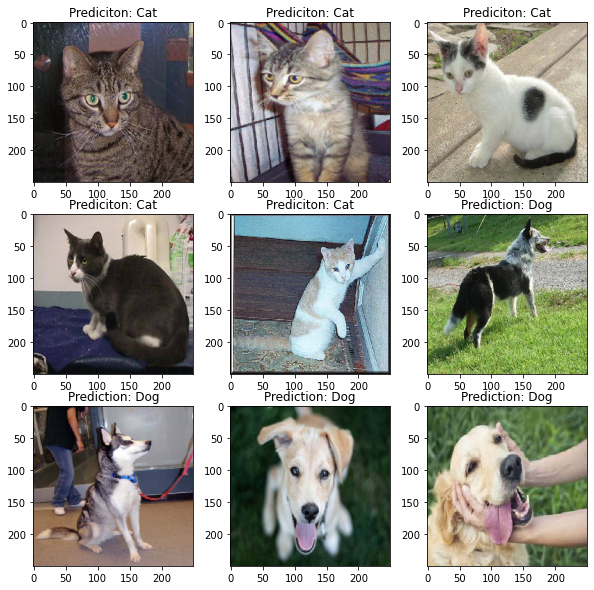

In [46]:
# predict on 9 testing images and visualize the result
fig1 = plt.figure(figsize = (10, 10))
a = [i for i in range(1,10)]
for i in a:
    img_name = str(i) + '.jpg'
    img_path = img_name
    feature_i = imageProcess(img_path, model_vgg)
    result = model.predict_classes(feature_i)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3, 3, i)
    plt.imshow(img_ori)
    plt.title('Prediction: Dog' if result[0][0] == 1 else 'Prediciton: Cat')
plt.show()